# Conexão com postgres e Relatorios do Sistema

## Instalando biblioteca de acesso com postgres e manipulação de dados e gráficos

In [1]:
!pip install --user psycopg2-binary
!pip install --user seaborn
!pip install --user pandas

### Importando bibliotecas

In [3]:
import seaborn as sns
import pandas as pd
import psycopg2

### Usando psycopg2 para configurar conexão

In [5]:
conn = psycopg2.connect(host="motty.db.elephantsql.com",database="sshdyhwp"
	, user="sshdyhwp", password="pv4dQUfV5Hq5RpZHrlDlSnADCrL8bl6J")

## Obtendo dados do database com Pandas

# Relatório 1

### Objetivo: Demonstrar os meios de pagamentos mais ultilizados


Código para obtenção do resultado:

In [6]:
	trans = pd.read_sql_query(""" select id_transacao,cpf,numero_cartao,fk_nfc_cartao,tipo_cartao 
                                from transacao 
                                join cartao 
                                on(transacao.fk_id_cartao = cartao.id_cartao) """,conn)

In [7]:
trans

,id_transacao,cpf,numero_cartao,fk_nfc_cartao,tipo_cartao
0,0,015.993.860-03,529651794981,9DD16B33C30CB,DEBITO
1,1,015.993.860-03,533329005506,9DD16B33C30CB,CREDITO
2,2,015.993.860-03,548180659063,9DD16B33C30CB,CREDITO
3,3,015.993.860-03,662384903507,9DD16B33C30CB,DEBITO
4,4,163.096.250-39,640375869556,CB275D68A8227,DEBITO
5,5,163.096.250-39,568578651646,CB275D68A8227,DEBITO
6,6,163.096.250-39,548141789993,CB275D68A8227,CREDITO
7,7,182.246.953-87,794236528091,3B215F9429BA0,CREDITO
8,8,165.368.663-47,560094973043,A1F5B595B3BD7,DEBITO
9,9,165.368.663-47,503526980568,A1F5B595B3BD7,CREDITO


# Relatorio 2

### Objetivo: Demonstrar as linhas mais ultilizadas em um dia

codigo para obtenção do resultado:

In [9]:

linhaDia = pd.read_sql_query(""" select numero_onibus,count(numero_onibus)as Saidas_dia ,dia_viagem  
                                from viagem 
                                group by dia_viagem,numero_onibus 
                                order by Saidas_dia desc;""",conn)

In [10]:
linhaDia

,numero_onibus,saidas_dia,dia_viagem
0,914,5,2019-05-12
1,914,2,2019-05-13
2,635,2,2019-06-19
3,793,2,2019-05-12
4,793,1,2019-06-19
5,704,1,2018-05-25
6,753,1,2019-10-24
7,851,1,2018-11-15
8,563,1,2019-07-01
9,834,1,2019-07-12


# Relatorio 3

### Objetivo: Demonstrar os clientes e suas respectivas chaves NFC


codigo para obtenção do resultado:

In [11]:
cliente = pd.read_sql_query("""select nfc_uid_usuario,nome,saldo 
                                from cartao_nfc 
                                join clientes 
                                on (cartao_nfc.cpf_proprietario = clientes.cpf);""",conn)


In [12]:
cliente

,nfc_uid_usuario,nome,saldo
0,EB3A9528C0D7D,Gabriela Luzia Patrícia Barros,$9.18
1,9DD16B33C30CB,Márcio Diogo Ruan Barros,$50.43
2,CB275D68A8227,Anthony José Duarte,$77.03
3,3B215F9429BA0,Noah Renato Pereira,$27.09
4,22A5678F4668A,Sarah Laura da Silva,$75.75
5,E5F4860C748ED,Fabiana Andrea Patrícia Martins,$150.14
6,A1F5B595B3BD7,Alice Gabriela da Silva,$119.96
7,721CF4F99F66B,Sarah Laura da Silva,$144.47
8,6EAB0B4C3D33B,Geraldo Kaique Vicente Araújo,$169.82
9,5FCE46C857EBA,Luciana Louise Moreira,$45.57


# Relatorio 4

### Objetivo: Demonstrar recarga do cartão NFC

codigo para obtenção do resultado:

In [13]:
    cl_nsaldo = pd.read_sql_query("""
                                    select nome,cnfc.nfc_uid_usuario,saldo,valor as valor_transacao,saldo + valor as novo_saldo,data_transacao 
                                    from cartao_nfc as cnfc 
                                    join clientes 
                                    on(cnfc.cpf_proprietario = clientes.cpf) 
                                    join transacao as t 
                                    on(cnfc.nfc_uid_usuario = t.fk_nfc_cartao );""",conn)

In [14]:
cl_nsaldo

,nome,nfc_uid_usuario,saldo,valor_transacao,novo_saldo,data_transacao
0,Márcio Diogo Ruan Barros,9DD16B33C30CB,$50.43,$201.99,$252.42,2020-02-24
1,Márcio Diogo Ruan Barros,9DD16B33C30CB,$50.43,$324.21,$374.64,2013-05-15
2,Márcio Diogo Ruan Barros,9DD16B33C30CB,$50.43,$240.95,$291.38,2019-07-21
3,Márcio Diogo Ruan Barros,9DD16B33C30CB,$50.43,$281.18,$331.61,2017-07-21
4,Anthony José Duarte,CB275D68A8227,$77.03,$115.76,$192.79,2018-11-23
5,Anthony José Duarte,CB275D68A8227,$77.03,$485.63,$562.66,2018-06-22
6,Anthony José Duarte,CB275D68A8227,$77.03,$224.50,$301.53,2017-08-17
7,Noah Renato Pereira,3B215F9429BA0,$27.09,$184.50,$211.59,2016-03-09
8,Alice Gabriela da Silva,A1F5B595B3BD7,$119.96,$460.22,$580.18,2015-09-02
9,Alice Gabriela da Silva,A1F5B595B3BD7,$119.96,$18.90,$138.86,2017-12-24


## Relatório 5

### Objetivo: Mostrar os Terminais/agencias e suas respectivas empresas

codigo para obtenção do resultado:

In [15]:
terminais = pd.read_sql_query("""select t.nome,linhas,e.nome as Empresa from terminais as t 
                                    join empresas as e
                                    on(t.fk_cnpj = e.cnpj) order by t.nome	""",conn)

In [16]:
terminais

,nome,linhas,empresa
0,AGUIABRANCA-Aeroporto de vitoria,None,Viacao Aguia Branca S/A
1,AGUIABRANCA-Aracruz,None,Viacao Aguia Branca S/A
2,AGUIABRANCA-Brejetuba,None,Viacao Aguia Branca S/A
3,AGUIABRANCA-Cachoeiro de itapimirim,None,Viacao Aguia Branca S/A
4,AGUIABRANCA-Campo grande,None,Viacao Aguia Branca S/A
5,AGUIABRANCA-Colatina,None,Viacao Aguia Branca S/A
6,AGUIABRANCA-Crapina(serra),None,Viacao Aguia Branca S/A
7,AGUIABRANCA-Guarapari,None,Viacao Aguia Branca S/A
8,TERMINAL CAMPO GRANDE,"509,511,515,524,526,530,531,533,534,535,536,54...",COMPANHIA DE TRANSPORTES URBANOS DA GRANDE VIT...
9,TERMINAL CARAPINA,"501,502,503,504,505,506,508,509,510,511,512,51...",COMPANHIA DE TRANSPORTES URBANOS DA GRANDE VIT...


# Gráficos 

### Gráfico 1: Quantide de cada tipo de cartão

Código para obtenção dos gráficos

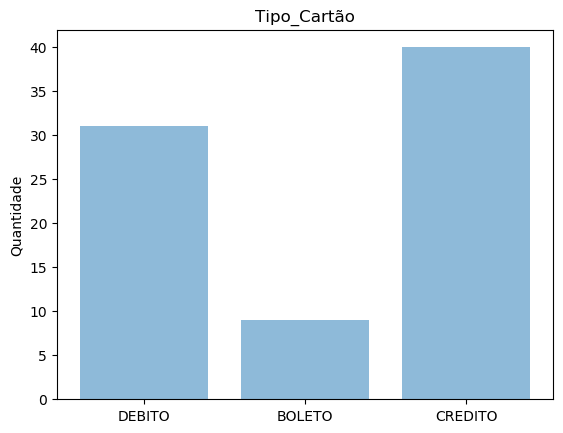

In [19]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

result = pd.read_sql_query(""" select tipo_cartao,count(tipo_cartao)as qtd from cartao group by(tipo_cartao)""",conn)
df = pd.DataFrame(result)
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)

objects = tuple(df.tipo_cartao)
y_pos = np.arange(len(objects))
performance = list(df.qtd)

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Quantidade')
plt.title('Tipo_Cartão')
 
plt.show()


### Gráfico 2: Épocas em que são feita mais viagens 

Código para obtenção dos gráficos

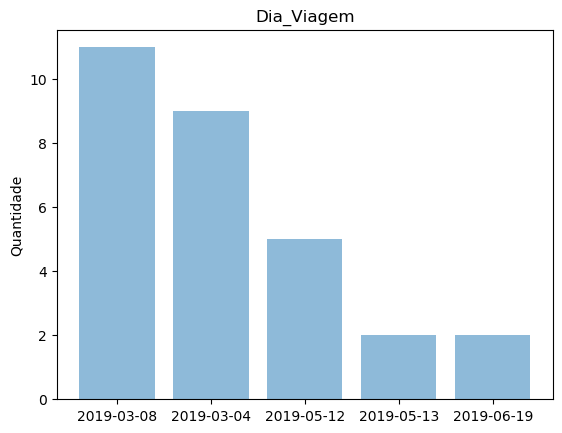

In [20]:
result = pd.read_sql_query(""" select dia_viagem,count(dia_viagem) as qtd from viagem group by dia_viagem order by qtd desc limit 5""",conn)
df = pd.DataFrame(result)
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)

objects = tuple(df.dia_viagem)
y_pos = np.arange(len(objects))
performance = list(df.qtd)	

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Quantidade')
plt.title('Dia_Viagem')
 
plt.show()

### Gráfico 3: Cidades com mais ofertas de terminais/agências de transporte

Código para obtenção dos gráficos

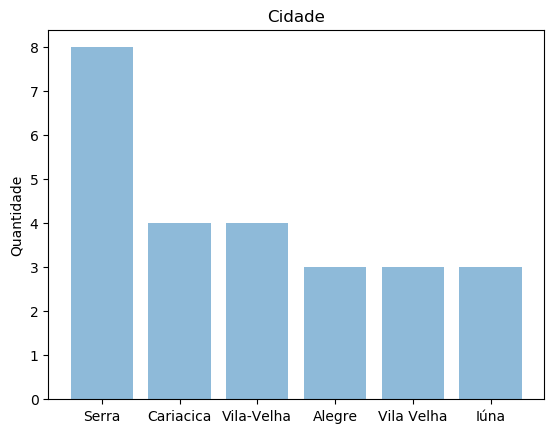

In [22]:
	result = pd.read_sql_query(""" select cidade,count(cidade) as qtd 
                                    from enderecos as e join terminais as t 
                                    on(e.id_endereco = t.fk_endereco) 
                                    group by(cidade) 
                                    order by qtd desc limit 6 """,conn)

	df = pd.DataFrame(result)
	cm = sns.light_palette("green", as_cmap=True)
	df.style.background_gradient(cmap=cm)
	
	objects = tuple(df.cidade)
	y_pos = np.arange(len(objects))
	performance = list(df.qtd)	
	
	plt.bar(y_pos, performance, align='center', alpha=0.5)
	plt.xticks(y_pos, objects)
	plt.ylabel('Quantidade')
	plt.title('Cidade')
 
	plt.show()